#1.

En un cirtcuito con un voltaje de ε(t) y una inductancia de L, la primera ley de Kirchhoff nos da la siguiente relación:

ε(t)=L di/dt + Ri
donde R, es la resistencia del ciruito, I
 es la corriente. Suponga que medimos la corriente con varios valores de t
 y obtenemos:

t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente

donde t se mide en segundos, I se da en Amperios, la inductancia L=0.98 H y la resistencia es de 0.142 Ω. Aproxime el votaje ε(t) en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 , para ello realice lo siguiente:

a) Construya un data frame de pandas con los valores de tiempo y corriente

b)Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.

c)Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator


# Datos
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])   # segundos
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])   # amperios

# Constantes del circuito
L = 0.98   # Henry
R = 0.142  # Ohms

# a)
df = pd.DataFrame({'Tiempo (s)': t, 'Corriente (A)': i})
print(df)

# b) Derivada con diferencias finitas de 3 puntos
di_dt = np.zeros_like(i)

h = t[1] - t[0]

# Usamos fórmulas de 3 puntos: centradas e inclinadas
di_dt[0] = (-3*i[0] + 4*i[1] - i[2]) / (2*h)              # hacia adelante
for j in range(1, len(i)-1):
    di_dt[j] = (i[j+1] - i[j-1]) / (2*h)                  # centradas
di_dt[-1] = (3*i[-1] - 4*i[-2] + i[-3]) / (2*h)           # hacia atrás

# Calculamos el voltaje: ε(t) = L * di/dt + R * i
epsilon_df = L * di_dt + R * i

df['di/dt (aprox)'] = di_dt
df['ε(t) aproximado (V)'] = epsilon_df
print("\nCon diferencias finitas:")
print(df)

# c) Interpolación + derivada usando np.gradient (derivada del interpolador)
interp = BarycentricInterpolator(t, i)

# Derivada de la función interpolada en los mismos puntos
# Aproximamos con np.gradient (es robusto y evita problemas de importación)
ti_fine = np.linspace(t[0], t[-1], 1000)
ii_fine = interp(ti_fine)
di_dt_interp_fine = np.gradient(ii_fine, ti_fine)

# Interpolamos esa derivada fina en los puntos originales
from scipy.interpolate import interp1d
interp_deriv = interp1d(ti_fine, di_dt_interp_fine)
di_dt_interp = interp_deriv(t)

epsilon_interp = L * di_dt_interp + R * i

df["di/dt (interp)"] = di_dt_interp
df["ε(t) interp"] = epsilon_interp

# Mostrar DataFrame
print(df)

   Tiempo (s)  Corriente (A)
0        1.00           3.10
1        1.01           3.12
2        1.02           3.14
3        1.03           3.18
4        1.04           3.24

Con diferencias finitas:
   Tiempo (s)  Corriente (A)  di/dt (aprox)  ε(t) aproximado (V)
0        1.00           3.10            2.0              2.40020
1        1.01           3.12            2.0              2.40304
2        1.02           3.14            3.0              3.38588
3        1.03           3.18            5.0              5.35156
4        1.04           3.24            7.0              7.32008
   Tiempo (s)  Corriente (A)  di/dt (aprox)  ε(t) aproximado (V)  \
0        1.00           3.10            2.0              2.40020   
1        1.01           3.12            2.0              2.40304   
2        1.02           3.14            3.0              3.38588   
3        1.03           3.18            5.0              5.35156   
4        1.04           3.24            7.0              7.32008   

 

#2.

Utilizando los siguientes datos de tiempo y distancia:

t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
Determinar la velocidad instantanea para cada uno de los tiempos y distancias mostrados.

¿Cuál será la velocidad para t=12?

In [4]:
# Datos
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo (s)
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia (m)

# a) Derivada numérica (diferencias finitas centradas)
v = np.zeros_like(x, dtype=float)
n = len(t)

# Extremos (adelantada y retrasada)
v[0] = (x[1] - x[0]) / (t[1] - t[0])
v[-1] = (x[-1] - x[-2]) / (t[-1] - t[-2])

# Puntos intermedios (centradas)
for i in range(1, n-1):
    v[i] = (x[i+1] - x[i-1]) / (t[i+1] - t[i-1])

# Mostrar resultados en un DataFrame
df = pd.DataFrame({
    'Tiempo (s)': t,
    'Distancia (m)': x,
    'Velocidad (m/s)': v
})
print(df)

# b) Estimar velocidad en t = 12 usando interpolación
interp = BarycentricInterpolator(t, x)

# Derivar numéricamente la función interpolada en muchos puntos
ti = np.linspace(min(t), max(t), 1000)
xi = interp(ti)
dx_dt = np.gradient(xi, ti)

# Crear interpolador de la derivada
from scipy.interpolate import interp1d
dx_dt_interp = interp1d(ti, dx_dt)

# Estimar velocidad en t = 12
v_12 = dx_dt_interp(12.0)
print(f"\nVelocidad estimada en t=12 s: {v_12:.3f} m/s")

   Tiempo (s)  Distancia (m)  Velocidad (m/s)
0           0              0        75.000000
1           3            225        76.600000
2           5            383        79.600000
3           8            623        71.800000
4          10            742        74.000000
5          13            993        83.666667

Velocidad estimada en t=12 s: 91.738 m/s


#3.

Las estaciones de radar A y B, separadas por una distancia a=500m, rastrean un avión C registrando los ángulos α y β en intervalos de 1 segundo. Tres lecturas sucesivas son:

data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)

Calcular la velocidad v
 del avión y el ángulo de ascenso γ
 en t=10s. Las coordenadas del avión pueden expresarse como:

x= a tanβ/(tanβ−tanα)

y= a (tanα tanβ)/(tanβ−tanα)

In [5]:
from math import tan, radians, sqrt, atan2, degrees

# Datos
a = 500  # Distancia entre radares (m)
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}
df = pd.DataFrame(data)

# Convertir a radianes
alpha = np.radians(df['alpha (°)'])
beta = np.radians(df['beta (°)'])

# Calcular posiciones (x, y) en cada t
x = a * np.tan(beta) / (np.tan(beta) - np.tan(alpha))
y = a * (np.tan(alpha) * np.tan(beta)) / (np.tan(beta) - np.tan(alpha))

df['x (m)'] = x
df['y (m)'] = y

# Derivar usando diferencias centradas para t = 10 s (índice 1)
dt = 1  # Intervalo de tiempo en segundos
vx = (x[2] - x[0]) / (2 * dt)
vy = (y[2] - y[0]) / (2 * dt)

# Magnitud de la velocidad
v = np.sqrt(vx**2 + vy**2)

# Ángulo de ascenso
gamma = np.arctan2(vy, vx)
gamma_deg = np.degrees(gamma)

# Resultados
print(df)
print(f"\nVelocidad del avión en t=10s: v = {v:.2f} m/s")
print(f"Ángulo de ascenso γ = {gamma_deg:.2f}°")

   t (s)  alpha (°)  beta (°)        x (m)        y (m)
0      9      54.80     65.59  1401.918398  1987.346016
1     10      54.06     64.59  1450.497006  2000.840713
2     11      53.34     63.62  1498.640350  2013.512411

Velocidad del avión en t=10s: v = 50.10 m/s
Ángulo de ascenso γ = 15.14°


#4.

Se proporcionan los siguientes datos para la velocidad de un objeto en función del tiempo:

Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
¿Qué tan lejos viaja el objeto desde t=0 hasta 28 s?
¿Cuál es la aceleración del objeto a t=28s?

In [7]:
from scipy.integrate import simpson, trapezoid

# Datos
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # tiempo en segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # velocidad en m/s

# 1. Distancia desde t = 0 hasta t = 28 s (tomamos primeros 8 puntos, hasta t=28)
t_subset = t[:8 + 1]  # hasta índice 7 (t=28)
v_subset = v[:8 + 1]

# Método del trapecio
dist_trapz = trapezoid(v_subset, t_subset)

# Método de Simpson
dist_simpson = simpson(v_subset, t_subset)

# 2. Aceleración en t = 28 s (índice 7)
# Usamos diferencias centradas con puntos 6, 7 y 8
i = 7
a_28 = (v[i + 1] - v[i - 1]) / (t[i + 1] - t[i - 1])

# Resultados
print(f"Distancia recorrida (Trapecio): {dist_trapz:.2f} m")
print(f"Distancia recorrida (Simpson): {dist_simpson:.2f} m")
print(f"Aceleración en t = 28 s: {a_28:.2f} m/s²")

Distancia recorrida (Trapecio): 2839.80 m
Distancia recorrida (Simpson): 2851.07 m
Aceleración en t = 28 s: 1.72 m/s²


#5.
El área superficial horizontal A_s(m^2) de un lago a una profundidad particular puede calcularse a partir del volumen por diferenciación:

A_s(z)=−dV(z)/dz

donde:

V= volumen (m^3)
z= profundidad (m) medida desde la superficie hacia el fondo
La concentración promedio de una sustancia que varía con la profundidad c
 (g/m^3) puede calcularse por integración:

 c=(∫desde 0 hasta Z c(z)A_s(z)dz)/VT

 donde:

Z= profundidad total (m)
VT= volumen total del lago, dado también por:

VT=∫desde 0 hasta Z A_s(z)dz

Con base en los siguientes datos, determine la concentración promedio.

Datos proporcionados

z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

Parámetros importantes

Z = z[-1]  # profundidad total (16 m)

In [9]:


# Datos
z = np.array([0, 4, 8, 12, 16])  # profundidad (m)
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen (m³)
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración (g/m³)
Z = z[-1]

# 1. Derivar volumen para obtener A_s(z)
# Usamos np.gradient para derivada con respecto a z
dV_dz = np.gradient(V, z)
A_s = -dV_dz  # negativo según la fórmula

# 2. Volumen total VT = ∫ A_s(z) dz
VT = simpson(A_s, z)

# 3. Integrar c(z) * A_s(z)
num = simpson(c * A_s, z)

# 4. Concentración promedio
c_prom = num / VT

# Resultados
print(f"Área superficial A_s(z): {A_s}")
print(f"Volumen total del lago VT: {VT:.2f} m³")
print(f"Concentración promedio: {c_prom:.4f} g/m³")

Área superficial A_s(z): [1178100.   981750.   589050.   245437.5   98175. ]
Volumen total del lago VT: 9817500.00 m³
Concentración promedio: 8.0973 g/m³


#6.
La función de onda del electrón en estado 2s (n=2, l=0, m=0) en unidades radiales adimensionales es:

ψ_200(r,θ,φ)=(1/(4√2π)) (2−r)e^(−r/2)

La probabilidad de encontrar el electrón entre r=0 y r=R está dada por:

P(R)=1/8 ∫desde 0 hasta R r^2 (2−r)^2 e^−r dr

donde las integrales angulares contribuyen un factor de 4π.

a) Calcule las probabilidades P(R) para R∈[10,25] con incrementos de 1 utilizando los métodos:
Trapezoidal
Simpson
Cuadratura
Garantizando que el error sea menor a ε=10^−6

b) Calcule la integral radial desde r=0 hasta +∞, verifique que la probabilidad total sea 1.


In [11]:
from scipy.integrate import quad

# Función bajo la integral
def integrand(r):
    return r**2 * (2 - r)**2 * np.exp(-r)

# R en el rango de 10 a 25
R_vals = np.arange(10, 26, 1)
P_trap = []
P_simp = []
P_quad = []

print("Valores de P(R):")
print(f"{'R':>3} {'Trapezoidal':>15} {'Simpson':>15} {'Quad':>15}")
for R in R_vals:
    r = np.linspace(0, R, 1000)
    f_r = integrand(r)

    # Trapezoidal y Simpson
    I_trap = (1/8) * trapezoid(f_r, r)
    I_simp = (1/8) * simpson(f_r, r)

    # Cuadratura con tolerancia de error
    I_quad, _ = quad(lambda r: integrand(r)/8, 0, R, epsabs=1e-8)

    P_trap.append(I_trap)
    P_simp.append(I_simp)
    P_quad.append(I_quad)

    print(f"{R:>3} {I_trap:15.10f} {I_simp:15.10f} {I_quad:15.10f}")

# Calcular la probabilidad total (desde 0 hasta infinito)
P_total, _ = quad(lambda r: integrand(r)/8, 0, np.inf, epsabs=1e-10)
print(f"\nProbabilidad total P(∞): {P_total:.10f}")

Valores de P(R):
  R     Trapezoidal         Simpson            Quad
 10    0.9404805252    0.9404806924    0.9404806921
 11    0.9682228032    0.9682229270    0.9682229265
 12    0.9835518591    0.9835519442    0.9835519435
 13    0.9917076446    0.9917077000    0.9917076990
 14    0.9959130029    0.9959130376    0.9959130363
 15    0.9980248835    0.9980249051    0.9980249034
 16    0.9990617827    0.9990617964    0.9990617942
 17    0.9995610511    0.9995610607    0.9995610579
 18    0.9997973914    0.9997973991    0.9997973956
 19    0.9999076036    0.9999076107    0.9999076064
 20    0.9999583192    0.9999583268    0.9999583214
 21    0.9999813808    0.9999813893    0.9999813828
 22    0.9999917558    0.9999917658    0.9999917580
 23    0.9999963783    0.9999963901    0.9999963808
 24    0.9999984197    0.9999984337    0.9999984226
 25    0.9999993139    0.9999993302    0.9999993172

Probabilidad total P(∞): 1.0000000000


#7.
Una lámina cuadrada uniforme de metal flota inmóvil en el espacio:

La lámina cuadrada tiene 10 m de lado y espesor despreciable. La componente de la fuerza gravitacional a lo largo del eje z sobre una masa de prueba de 1 kg ubicada a distancia z del centro de la lámina es:

Fz=Gσz∬desde−L/2 hasta L/2 dxdy/((x^2+y^2+z^2)^3/2)

donde G=6.674×10^−11 m^3 kg^−1 s^−2, σ=M/L^2, L=10 m y M=10,000 kg.

a) Calcular numéricamente esta integral doble.

b) Graficar Fz como función de z desde z=0 hasta z=10 m


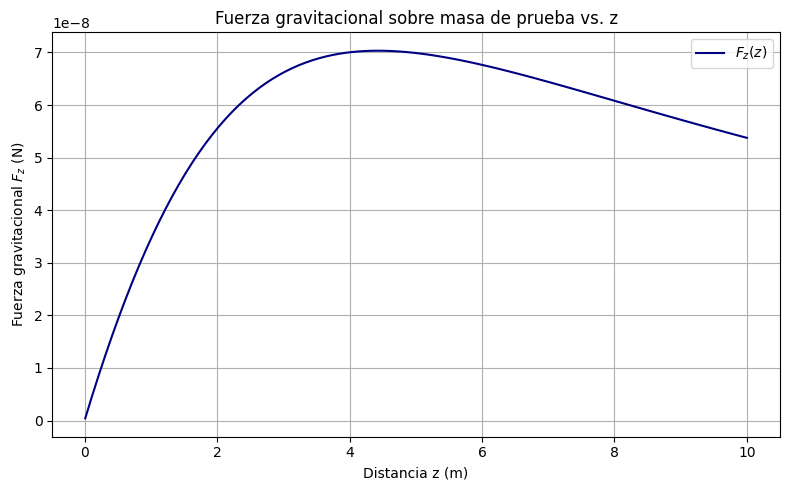

In [12]:
from scipy.integrate import dblquad

# Constantes
G = 6.674e-11  # Constante gravitacional (m^3/kg/s^2)
L = 10         # Lado de la lámina (m)
M = 10000      # Masa total (kg)
sigma = M / L**2  # Densidad superficial de masa (kg/m^2)

# Definimos la función a integrar para Fz
def integrand(y, x, z):
    return z / ((x**2 + y**2 + z**2)**(3/2))

# Función que evalúa Fz para un valor dado de z
def Fz(z):
    val, err = dblquad(
        integrand,
        -L/2, L/2,                   # límites en x
        lambda x: -L/2, lambda x: L/2,  # límites en y
        args=(z,)
    )
    return G * sigma * z * val

# Vector de valores de z
z_vals = np.linspace(0.01, 10, 100)  # z desde 0.01 hasta 10 m
Fz_vals = np.array([Fz(z) for z in z_vals])

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(z_vals, Fz_vals, label=r'$F_z(z)$', color='navy')
plt.xlabel('Distancia z (m)')
plt.ylabel('Fuerza gravitacional $F_z$ (N)')
plt.title('Fuerza gravitacional sobre masa de prueba vs. z')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()